# Python, Graphs and Game of Thrones.

![](got.png)

**Blog:** https://networkofthrones.wordpress.com/

**Article:** https://www.maa.org/sites/default/files/pdf/Mathhorizons/NetworkofThrones%20%281%29.pdf

**Workshop:** https://github.com/MridulS/euroscipy-2017-networkx

In [1]:
import pandas as pd
import networkx as nx
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

font = {'weight': 'bold',
        'size'   : 18}
matplotlib.rc('font', **font)

The data
---------

In [3]:
a_game_of_thrones = pd.read_csv('/home/nightwing/rsc/Euroscipy-Tutorials/euroscipy-2017-networkx/data/asoiaf-book1-edges.csv')

In [4]:
a_game_of_thrones.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


Creating the graph
------------------

In [5]:
G = nx.Graph()

In [6]:
for row in a_game_of_thrones.iterrows():
    G.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])

# Central character based on,

Degree centrality
---------------------

returns a dictionary where keys are the nodes and values are the corresponsing degree centrality. Let's find the five most important character according to degree centrality.

In [7]:
central_characters = sorted(nx.degree_centrality(G).items(), key=lambda x:x[1], reverse=True)[0:10]
central_characters

[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.2688172043010753),
 ('Tyrion-Lannister', 0.24731182795698928),
 ('Catelyn-Stark', 0.23118279569892475),
 ('Jon-Snow', 0.19892473118279572),
 ('Robb-Stark', 0.18817204301075272),
 ('Sansa-Stark', 0.18817204301075272),
 ('Bran-Stark', 0.17204301075268819),
 ('Cersei-Lannister', 0.16129032258064518),
 ('Joffrey-Baratheon', 0.16129032258064518)]

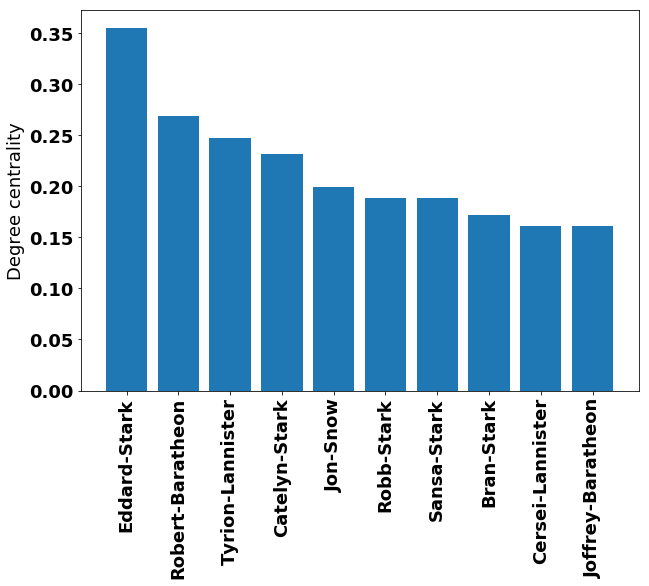

In [8]:
fig = plt.figure(figsize=(10, 7))
characters = [row[0] for row in central_characters]
centrality = [row[1] for row in central_characters]
x_pos = np.arange(len(characters)) 
   
plt.bar(x_pos, centrality, align='center')
plt.xticks(x_pos, characters, rotation=90) 
plt.ylabel('Degree centrality')

plt.savefig('posts_images/degree_centrality.pdf', transparent=True, bbox_inches='tight')

Betweeness centrality 
------------------------

From Wikipedia:
For every pair of vertices in a connected graph, there exists at least one shortest path between the vertices such that either the number of edges that the path passes through (for unweighted graphs) or the sum of the weights of the edges (for weighted graphs) is minimized. The betweenness centrality for each vertex is the number of these shortest paths that pass through the vertex.

In [9]:
# unweighted
betweeness_unweighted = sorted(nx.betweenness_centrality(G).items(), 
                               key=lambda x:x[1], reverse=True)[0:10]

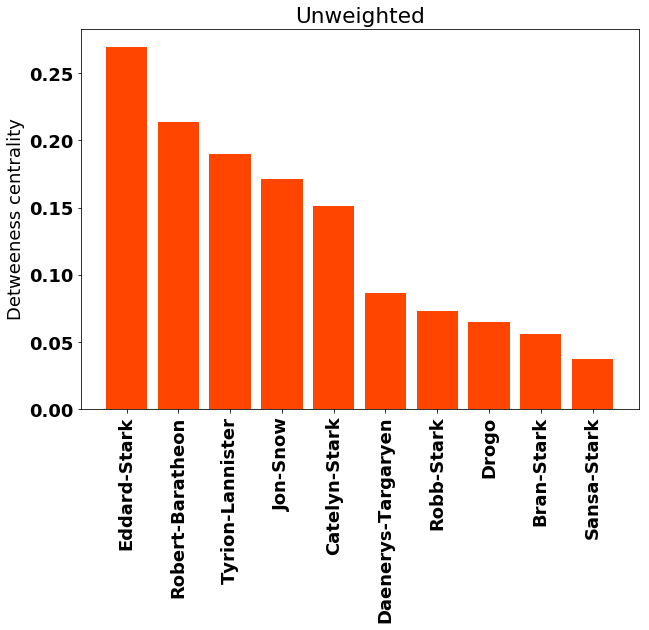

In [10]:
fig = plt.figure(figsize=(10, 7))
characters = [row[0] for row in betweeness_unweighted]
centrality = [row[1] for row in betweeness_unweighted]
x_pos = np.arange(len(characters)) 
   
plt.bar(x_pos, centrality, align='center', color='orangered')
plt.xticks(x_pos, characters, rotation=90) 
plt.ylabel('Detweeness centrality')
plt.title('Unweighted')

plt.savefig('posts_images/betweeness_unweighted.pdf', transparent=True, bbox_inches='tight')

In [11]:
betweeness_weighted = sorted(nx.betweenness_centrality(G, weight='weight').items(), 
                             key=lambda x:x[1], reverse=True)[0:10]

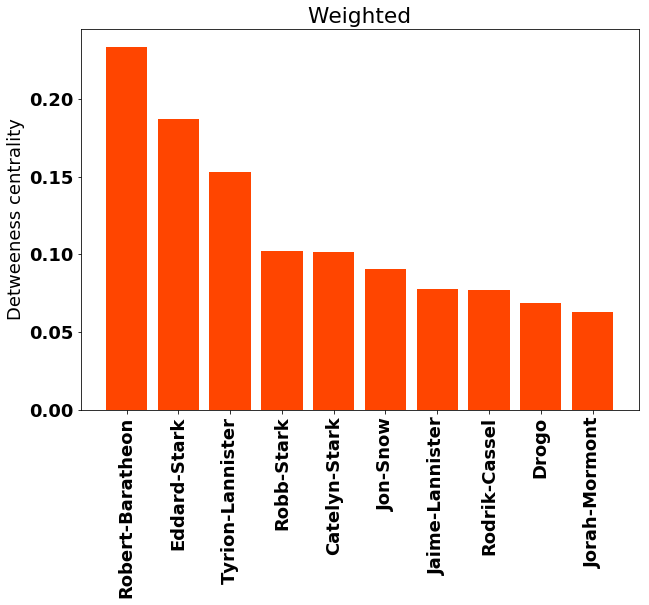

In [12]:
fig = plt.figure(figsize=(10, 7))
characters = [row[0] for row in betweeness_weighted]
centrality = [row[1] for row in betweeness_weighted]
x_pos = np.arange(len(characters)) 
   
plt.bar(x_pos, centrality, align='center', color='orangered')
plt.xticks(x_pos, characters, rotation=90) 
plt.ylabel('Detweeness centrality')
plt.title('Weighted')

plt.savefig('posts_images/betweeness.pdf', transparent=True, bbox_inches='tight')

PageRank
--------


The billion dollar algorithm, PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites.

In [13]:
page_rank_unweighted = sorted(nx.pagerank_numpy(G, weight=None).items(), 
                              key=lambda x:x[1], reverse=True)[0:10]

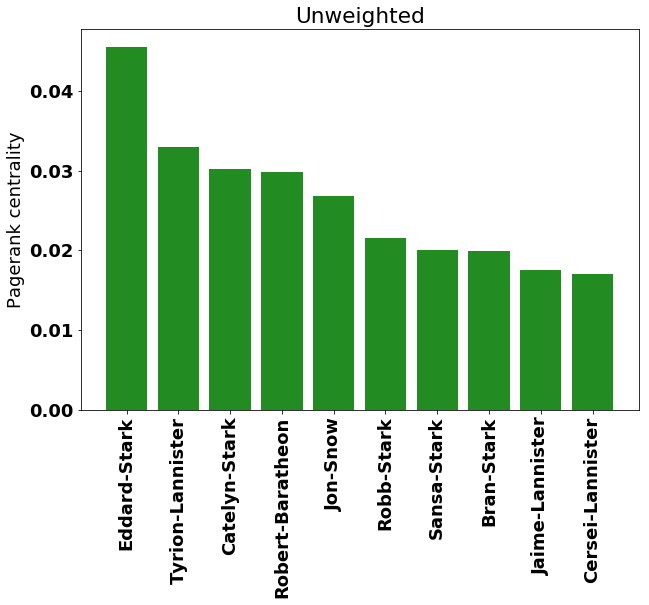

In [14]:
fig = plt.figure(figsize=(10, 7))
characters = [row[0] for row in page_rank_unweighted]
centrality = [row[1] for row in page_rank_unweighted]
x_pos = np.arange(len(characters)) 
   
plt.bar(x_pos, centrality, align='center', color='forestgreen')
plt.xticks(x_pos, characters, rotation=90) 
plt.ylabel('Pagerank centrality')
plt.title('Unweighted')

plt.savefig('posts_images/pagerank_unweighted.pdf', transparent=True, bbox_inches='tight')

In [15]:
page_rank_weighted = sorted(nx.pagerank_numpy(G, weight='weight').items(), 
                            key=lambda x:x[1], reverse=True)[0:10]

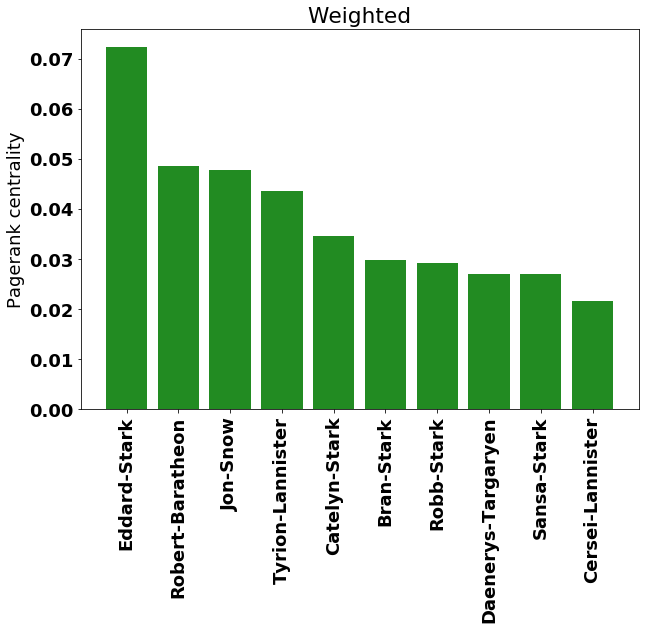

In [16]:
fig = plt.figure(figsize=(10, 7))
characters = [row[0] for row in page_rank_weighted]
centrality = [row[1] for row in page_rank_weighted]
x_pos = np.arange(len(characters)) 
   
plt.bar(x_pos, centrality, align='center', color='forestgreen')
plt.xticks(x_pos, characters, rotation=90) 
plt.ylabel('Pagerank centrality')
plt.title('Weighted')

plt.savefig('posts_images/pagerank.pdf', transparent=True, bbox_inches='tight')

Can we see the development of a character?
------------------------------------------

In [17]:
book2 = pd.read_csv('/home/nightwing/rsc/Euroscipy-Tutorials/euroscipy-2017-networkx/data/asoiaf-book2-edges.csv')
book3 = pd.read_csv('/home/nightwing/rsc/Euroscipy-Tutorials/euroscipy-2017-networkx/data/asoiaf-book3-edges.csv')
book4 = pd.read_csv('/home/nightwing/rsc/Euroscipy-Tutorials/euroscipy-2017-networkx/data/asoiaf-book4-edges.csv')
book5 = pd.read_csv('/home/nightwing/rsc/Euroscipy-Tutorials/euroscipy-2017-networkx/data/asoiaf-book5-edges.csv')

In [18]:
G_book2 = nx.Graph()
G_book3 = nx.Graph()
G_book4 = nx.Graph()
G_book5 = nx.Graph()

In [19]:
for row in book2.iterrows():
    G_book2.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book3.iterrows():
    G_book3.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book4.iterrows():
    G_book4.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book5.iterrows():
    G_book5.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])

In [20]:
evolution = [nx.betweenness_centrality(graph, weight='weight')
             for graph in [G, G_book2, G_book3, G_book4, G_book5]]

In [21]:
evol_df = pd.DataFrame.from_records(evolution).fillna(0)

In [22]:
evol_df

,Addam-Marbrand,Aegon-Frey-(son-of-Stevron),Aegon-I-Targaryen,Aegon-Targaryen-(son-of-Rhaegar),Aegon-V-Targaryen,Aemon-Targaryen-(Dragonknight),Aemon-Targaryen-(Maester-Aemon),Aenys-Frey,Aeron-Greyjoy,Aerys-I-Targaryen,...,Yellow-Dick,Yezzan-zo-Qaggaz,Ygritte,Yohn-Royce,Yoren,Yorko-Terys,Ysilla,Yurkhaz-zo-Yunzak,Zei,Zollo
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.010753,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.012934,0.0,0.000000,0.0,0.0,0.000000
1,0.000000,0.000000,0.020911,0.000000,0.0,0.0,0.023165,0.0,0.000000,0.0,...,0.000000,0.000000,0.007797,0.000000,0.021489,0.0,0.000000,0.0,0.0,0.000000
2,0.037056,0.001913,0.036763,0.000000,0.0,0.0,0.017567,0.0,0.000000,0.0,...,0.000000,0.000000,0.001518,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
3,0.009715,0.000000,0.000000,0.000000,0.0,0.0,0.014429,0.0,0.043310,0.0,...,0.000000,0.000000,0.000000,0.034094,0.000000,0.0,0.000000,0.0,0.0,0.005306
4,0.000000,0.000000,0.000000,0.049057,0.0,0.0,0.006852,0.0,0.006277,0.0,...,0.000441,0.000057,0.000000,0.000000,0.000000,0.0,0.005425,0.0,0.0,0.000000


In [23]:
evolution_table = evol_df[list(pd.DataFrame.from_records(evolution).max(axis=0).sort_values(ascending=False)[0:5].index)]
evolution_table

,Stannis-Baratheon,Daenerys-Targaryen,Robert-Baratheon,Jon-Snow,Balon-Greyjoy
0,0.009200,0.034182,0.233419,0.090277,0.009721
1,0.114470,0.082466,0.156943,0.153331,0.028395
2,0.141640,0.089971,0.150389,0.144756,0.000857
3,0.244235,0.000000,0.017238,0.049077,0.190584
4,0.364067,0.253818,0.200129,0.205652,0.005894


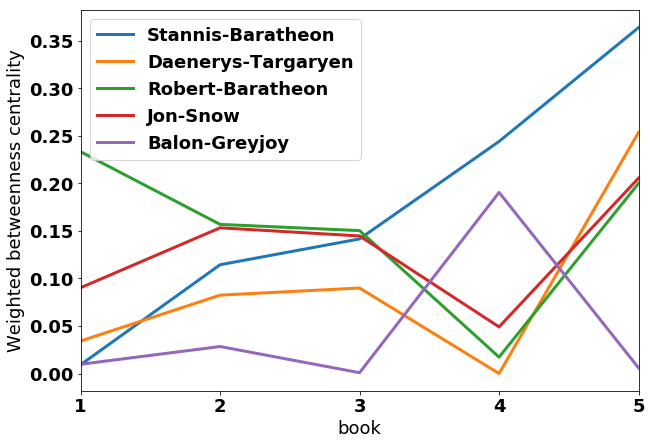

In [24]:
ax = evolution_table.plot(figsize=(10, 7), linewidth=3)
ax.set_xticks(range(5))
ax.set_xticklabels(['1', '2', '3', '4', '5'])
ax.set_xlabel('book')
ax.set_ylabel('Weighted betweenness centrality')

plt.savefig('posts_images/progress.pdf', transparent=True, bbox_inches='tight')

Can we draw the network?
------------------------

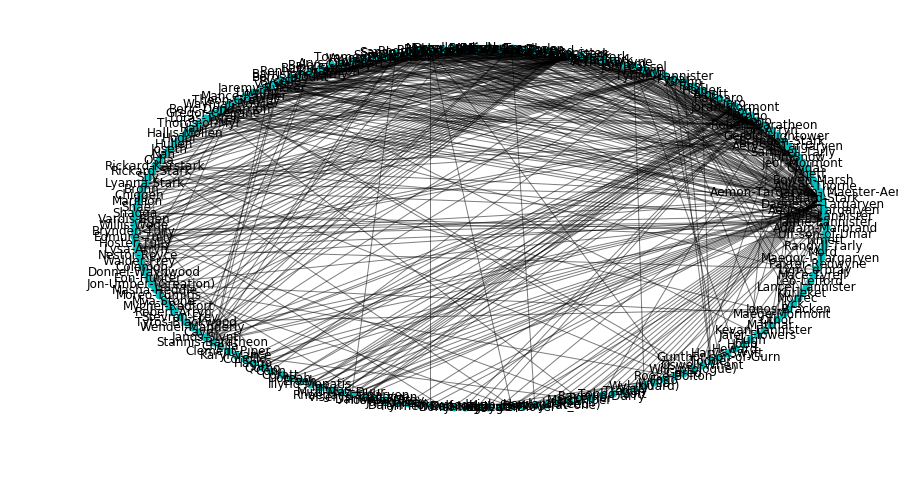

In [25]:
pos = nx.shell_layout(G)

fig = plt.figure(figsize=(15, 8))
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='c')
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='black')

nx.draw_networkx_labels(G,pos)

limits=plt.axis('off') 

plt.savefig('posts_images/network.pdf', transparent=True, bbox_inches='tight')

<h3><center>@NikoletaGlyn</center></h3>
<h3><center>Nikoleta-v3</center></h3>